In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the Data Files and get initial information **

In [2]:
metadata = pd.read_csv('2020-03-13/all_sources_metadata_2020-03-13.csv') 
#The metadata file has information about all the articles, but not the text of the articles itself

In [3]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 14 columns):
sha                            17420 non-null object
source_x                       29500 non-null object
title                          29130 non-null object
doi                            26357 non-null object
pmcid                          27337 non-null object
pubmed_id                      16730 non-null float64
license                        17692 non-null object
abstract                       26553 non-null object
publish_time                   18248 non-null object
authors                        28554 non-null object
journal                        17791 non-null object
Microsoft Academic Paper ID    1134 non-null float64
WHO #Covidence                 1236 non-null object
has_full_text                  17420 non-null object
dtypes: float64(2), object(12)
memory usage: 3.2+ MB


In [4]:
metadata.describe()

,pubmed_id,Microsoft Academic Paper ID
count,1.673000e+04,1.134000e+03
mean,2.626759e+07,2.697968e+09
std,4.697935e+06,4.873586e+08
min,6.717300e+04,3.912630e+07
25%,2.363481e+07,2.366820e+09
50%,2.704658e+07,3.002534e+09
75%,2.995128e+07,3.005536e+09
max,1.347697e+08,3.006672e+09


In [5]:
metadata.columns

Index(['sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license',
       'abstract', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text'],
      dtype='object')

In [6]:
data = pd.read_csv('master.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13203 entries, 0 to 13202
Data columns (total 6 columns):
Unnamed: 0    13203 non-null int64
doc_id        13202 non-null object
source        13202 non-null object
title         12259 non-null object
abstract      4420 non-null object
text_body     11129 non-null object
dtypes: int64(1), object(5)
memory usage: 619.0+ KB


In [8]:
data.describe()

,Unnamed: 0
count,13203.000000
mean,6601.000000
std,3811.522137
min,0.000000
25%,3300.500000
50%,6601.000000
75%,9901.500000
max,13202.000000


In [14]:
data['title'][1]

'The RNA pseudoknots in foot-and-mouth disease virus are dispensable for genome replication but essential for the production of infectious virus. 2 3'

In [15]:
for title in data['title'][1:5]:
    print(title)

The RNA pseudoknots in foot-and-mouth disease virus are dispensable for genome replication but essential for the production of infectious virus. 2 3
Healthcare-resource-adjusted vulnerabilities towards the 2019-nCoV epidemic across China
Real-time, MinION-based, amplicon sequencing for lineage typing of infectious bronchitis virus from upper respiratory samples
Assessing spread risk of Wuhan novel coronavirus within and beyond China, January-April 2020: a travel network-based modelling study


In [25]:
#count occurances of words in titles (to answer "What do we know about diagnostics and surveillance")
index_list = []
title_count=0
for title in data['title']:
    splist = str(title).split()
    temp_count = 0
    for word in splist:
        if word.lower() in ['testing', 'test', 'diagnostic', 'diagnostics', 'surveillance']:
            temp_count += 1
            index_list.append(data[data['title']==title].index.values.tolist())
            break
    if temp_count > 0 :
        title_count += 1

In [26]:
title_count

331

In [29]:
index_list = [item for sublist in index_list for item in sublist]

In [30]:
index_list

[12,
 51,
 65,
 126,
 160,
 204,
 291,
 336,
 415,
 417,
 445,
 447,
 523,
 533,
 535,
 580,
 584,
 619,
 703,
 12187,
 839,
 851,
 877,
 974,
 1023,
 1041,
 1058,
 1111,
 1193,
 1199,
 1230,
 1253,
 1278,
 1320,
 1329,
 1352,
 1400,
 1460,
 1469,
 1570,
 4192,
 1603,
 1606,
 1783,
 6909,
 1638,
 1719,
 1720,
 1738,
 1772,
 1606,
 1783,
 6909,
 1789,
 1796,
 1815,
 1835,
 1839,
 1864,
 1872,
 1898,
 1913,
 1947,
 1985,
 1987,
 2040,
 2090,
 2138,
 2150,
 2253,
 2255,
 2283,
 2294,
 2342,
 2346,
 2367,
 2395,
 2414,
 2427,
 2473,
 2487,
 2493,
 2509,
 2606,
 2694,
 2697,
 2711,
 2713,
 2727,
 2750,
 2781,
 2782,
 2808,
 2811,
 2861,
 2957,
 2978,
 3086,
 3096,
 3113,
 3123,
 3132,
 3143,
 3156,
 3214,
 3223,
 3237,
 3273,
 3299,
 3312,
 3340,
 3974,
 3423,
 3435,
 3450,
 3485,
 3488,
 3576,
 3618,
 3648,
 3654,
 3735,
 3748,
 3756,
 3843,
 3886,
 3931,
 3340,
 3974,
 4019,
 4085,
 4100,
 4124,
 4152,
 4171,
 1570,
 4192,
 4207,
 4215,
 4233,
 4239,
 4244,
 4251,
 4360,
 4382,
 4410,
 44

** Basic Bag of Words Analysis **

In [5]:
import string

In [20]:
#Only need to do this once. 
#import nltk # Imports the library
#nltk.download() #Download the necessary datasets

In [6]:
from nltk.corpus import stopwords

In [7]:
#Now, convert text to lists of tokens, apply vectoriztion to the text, and extract texts with highest word counts. 
#Much of this code taken/adapted from the Python for Data Science Udemy course
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [23]:
data.head()

,Unnamed: 0,doc_id,source,title,abstract,text_body
0,0,NaN,NaN,NaN,NaN,NaN
1,1,0015023cc06b5362d332b3baf348d11567ca2fbb,BIORXIV,The RNA pseudoknots in foot-and-mouth disease ...,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP..."
2,2,004f0f8bb66cf446678dc13cf2701feec4f36d76,BIORXIV,Healthcare-resource-adjusted vulnerabilities t...,NaN,NaN
3,3,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,BIORXIV,"Real-time, MinION-based, amplicon sequencing f...",Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by..."
4,4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,BIORXIV,Assessing spread risk of Wuhan novel coronavir...,NaN,"In December 2019, a cluster of patients with p..."


In [33]:
texts= ['title','abstract','text_body']
text_only = data[texts]

In [34]:
text_only.head()

,title,abstract,text_body
0,NaN,NaN,NaN
1,The RNA pseudoknots in foot-and-mouth disease ...,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP..."
2,Healthcare-resource-adjusted vulnerabilities t...,NaN,NaN
3,"Real-time, MinION-based, amplicon sequencing f...",Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by..."
4,Assessing spread risk of Wuhan novel coronavir...,NaN,"In December 2019, a cluster of patients with p..."


In [35]:
#test
text_only['title'][1:4].apply(text_process)

NameError: name 'text_process' is not defined

In [36]:
#clean dataframe to remove rows with NaN in title or text body
text_only.dropna(subset=['title','text_body'],inplace=True)
text_only.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,abstract,text_body
1,The RNA pseudoknots in foot-and-mouth disease ...,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP..."
3,"Real-time, MinION-based, amplicon sequencing f...",Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by..."
4,Assessing spread risk of Wuhan novel coronavir...,NaN,"In December 2019, a cluster of patients with p..."
5,"TWIRLS, an automated topic-wise inference meth...",Faced with the current large-scale public heal...,The sudden outbreak of the new coronavirus (SA...
6,Title: Viruses are a dominant driver of protei...,Viruses interact with hundreds to thousands of...,The copyright holder for this preprint (which ...


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(text_only['title'])

In [14]:
test_title = text_only['title'][3]
print(test_title)

Real-time, MinION-based, amplicon sequencing for lineage typing of infectious bronchitis virus from upper respiratory samples


In [36]:
test_bow = bow_transformer.transform([test_title])
print(test_bow)
print(test_bow.shape)

  (0, 8248)	1
  (0, 10914)	1
  (0, 14300)	1
  (0, 14894)	1
  (0, 17783)	1
  (0, 18286)	1
  (0, 20696)	1
  (0, 20897)	1
  (0, 21058)	1
  (0, 22094)	1
  (0, 22187)	1
  (0, 22353)	1
(1, 23119)


In [15]:
titles_bow = bow_transformer.transform(text_only['title'])

In [39]:
print('Shape of Sparse Matrix: ', titles_bow.shape)
print('Amount of Non-Zero occurences: ', titles_bow.nnz)

Shape of Sparse Matrix:  (10779, 23119)
Amount of Non-Zero occurences:  114369


In [43]:
sparsity = (100.0 * titles_bow.nnz / (titles_bow.shape[0] * titles_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.04589451734534786


In [46]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(titles_bow)
tfidf_test = tfidf_transformer.transform(test_bow)

In [47]:
print(tfidf_test)

  (0, 22353)	0.14542653475927733
  (0, 22187)	0.3061401090382126
  (0, 22094)	0.3626299619647658
  (0, 21058)	0.2516065749188464
  (0, 20897)	0.2730956634049257
  (0, 20696)	0.16327750477701794
  (0, 18286)	0.3178628126848458
  (0, 17783)	0.2026129655941108
  (0, 14894)	0.24373426120198394
  (0, 14300)	0.3626299619647658
  (0, 10914)	0.3214084232181746
  (0, 8248)	0.3908748884280424


In [50]:
#Check inverse document frequency of the word 'test' and 'virus'
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['test']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['virus']])

7.800541194674988
3.5688530709420103


In [52]:
#transform whole corpus into TF-IDF corpus
titles_tfidf = tfidf_transformer.transform(titles_bow)
print(titles_tfidf.shape)

(10779, 23119)


** Topic Modeling with NMF **

In [64]:
# With help from https://sanjayasubedi.com.np/nlp/nlp-with-python-topic-modeling/
# We model train and extract features (using TfidfVectorizer) from the text of the articles

#number of topics to extract
n_topics = 10

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words = 'english', max_df =0.95, min_df =2) #max and min document frequency
features = vec.fit_transform(text_only['title'])

In [69]:
cls.components_[1,1:10]

array([0.        , 0.        , 0.00011231, 0.        , 0.00207989,
       0.00372812, 0.        , 0.        , 0.        ])

In [65]:
#Use an NMF model for topic modeling
from sklearn.decomposition import NMF
cls = NMF(n_components = n_topics, random_state = 101) #last is the random seed
cls.fit(features)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=10, random_state=101, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [73]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()

#number of most influencing words to display per topic
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end = ' ')
    print()

0 virus infection hepatitis ebola replication zika dengue host syncytial bronchitis entry fever antiviral activity feline 
1 syndrome middle east respiratory coronavirus mers severe korea cov acute outbreak 2015 saudi reproductive camels 
2 respiratory infections viral acute children tract patients severe infection hospitalized clinical study pneumonia bacterial human 
3 coronavirus sars novel china 2019 covid cov 19 clinical wuhan patients transmission ncov mers outbreak 
4 protein human cells cell expression viral rna host immune response induced type responses interferon receptor 
5 porcine epidemic diarrhea genome virus strain sequence complete china characterization pedv analysis piglets reproductive pigs 
6 influenza pandemic h1n1 2009 avian h5n1 h7n9 transmission risk surveillance illness study like hemagglutinin factors 
7 infectious diseases emerging disease bronchitis vaccines review bmc control surveillance research tropical microbes www molecular 
8 health public care resea

In [72]:
feature_names[1:4]

['0201', '07', '10']

In [17]:
# Same Investigation but searching the whole text instead of just the titles
#number of topics to extract
n_topics = 10

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words = 'english', max_df =0.95, min_df =2) #max and min document frequency
features = vec.fit_transform(text_only['text_body'])

In [18]:
#Use an NMF model for topic modeling
from sklearn.decomposition import NMF
cls = NMF(n_components = n_topics, random_state = 101) #last is the random seed (use different or same?)
cls.fit(features)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=10, random_state=101, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [76]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()

#number of most influencing words to display per topic
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end = ' ')
    print()

0 respiratory children infections patients rsv tract pneumonia infection viruses acute cause clinical viral age common 
1 et al 2014 2013 2012 2015 2016 2011 2010 2017 2008 2006 2005 2007 2009 
2 cov mers sars coronavirus respiratory east middle syndrome human saudi coronaviruses arabia severe 2012 camels 
3 rna proteins viral protein viruses virus genome host replication membrane structural sequence gene species dna 
4 influenza pandemic virus h1n1 viruses h5n1 avian 2009 human seasonal h7n9 flu pandemics poultry humans 
5 health diseases public disease infectious data transmission emerging surveillance control outbreaks population global outbreak countries 
6 a1111111111 dengue zikv denv transmission host emergence endemic virus asia infection aerosols disease pathogen prrsv 
7 pedv diarrhea porcine ped pigs piglets swine virus epidemic disease industry tgev vomiting losses coronaviridae 
8 cells cell immune ifn infection response responses expression il inflammatory innate receptors

** KMeans Clustering **

In [19]:
# From https://sanjayasubedi.com.np/nlp/nlp-with-python-document-clustering/ we now try clustering
# First, compute TF-IDF values
vec = TfidfVectorizer(stop_words='english')
vec.fit(text_only.text_body.values)
features = vec.transform(text_only.text_body.values)

In [20]:
#Create an instance of KMeans.
from sklearn.cluster import KMeans

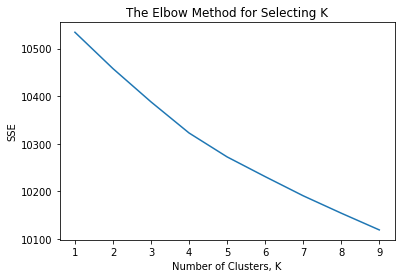

In [80]:
sse = {}
for k in range(1,10):  
    kmeans = KMeans(n_clusters = k,random_state=101)
    kmeans.fit(features)
    sse[k]= kmeans.inertia_
plt.title('The Elbow Method for Selecting K')
plt.xlabel('Number of Clusters, K'); plt.ylabel('SSE')
sns.lineplot(x=list(sse.keys()), y = list(sse.values()))#change to point plot when done running
plt.show()

In [24]:
kmeans2 = KMeans(n_clusters = 4, random_state = 101)
kmeans2.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

In [26]:
from sklearn.decomposition import PCA

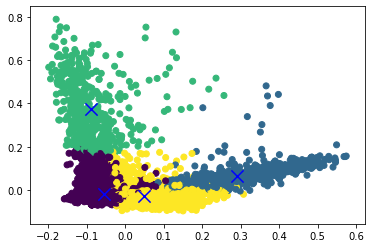

In [28]:
# Visualize by using PCA to reduce features to 2D
pca = PCA(n_components = 2, random_state=101)
reduced_features = pca.fit_transform(features.toarray())

#reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans2.cluster_centers_)

#Plot
plt.scatter(reduced_features[:,0], reduced_features[:,1],c =kmeans2.predict(features))
plt.scatter(reduced_cluster_centers[:,0],reduced_cluster_centers[:,1],marker='x', s=150, c='b')

** Nearest Neighbors Search **

Start with Feature Extraction on the Whole Corpus of Text

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_vec = TfidfVectorizer(max_features=10_000)
features = feature_vec.fit_transform(text_only.text_body) #feaure vectors, each with 10000 elements
print(features.shape)

(10779, 10000)


Model Training

In [38]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors = 10, metric = 'cosine') #cosine metric generally used for text similarity
#algorithm = 'auto' so chooses most appropriate algorithm based on "features"
knn.fit(features)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

Find Similar Items Given Input Text

In [39]:
#Find nearest neighbors to the first feature vector
knn.kneighbors(features[0:1], return_distance = False)

array([[   0,  203, 5794,  156,  583, 4260, 6789, 7301, 3612, 6771]])

In [40]:
knn.kneighbors(features[0:1], return_distance = True)

(array([[1.11022302e-16, 6.83125663e-01, 6.96438581e-01, 7.05180899e-01,
         7.10455057e-01, 7.11452383e-01, 7.11833678e-01, 7.12484799e-01,
         7.14403978e-01, 7.21911177e-01]]),
 array([[   0,  203, 5794,  156,  583, 4260, 6789, 7301, 3612, 6771]]))

In [60]:
text_only.reset_index(inplace=True)
text_only.head()

,index,title,abstract,text_body
0,1,The RNA pseudoknots in foot-and-mouth disease ...,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP..."
1,3,"Real-time, MinION-based, amplicon sequencing f...",Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by..."
2,4,Assessing spread risk of Wuhan novel coronavir...,NaN,"In December 2019, a cluster of patients with p..."
3,5,"TWIRLS, an automated topic-wise inference meth...",Faced with the current large-scale public heal...,The sudden outbreak of the new coronavirus (SA...
4,6,Title: Viruses are a dominant driver of protei...,Viruses interact with hundreds to thousands of...,The copyright holder for this preprint (which ...


In [61]:
# Give the Kaggle questions as input find the nearest neighbors.
input_texts = ["What is known about transmission, incubation, and environmental stability?", "What do we know about COVID-19 risk factors",
              "What do we know about virus genetics, origin, and evolution?", "What do we know about non-pharmaceutical inverventions?",
              "What do we know about vaccines and therapeutics?", "What has been published about ethical and social science considerations?",
              "What has been published about information sharing and inter-sectoral collaboration?", "What do we know about diagnostics and surveillance?",
              "What has been published about medical care?"]
input_features = feature_vec.transform(input_texts)

#Nearest Neighbor search
D,N = knn.kneighbors(input_features, n_neighbors = 5, return_distance = True)

#Create nice print out of results
for input_text, distances, neighbors, in zip(input_texts,D,N):
    print("Input text = ", input_text,"\n")
    for dist, neighbor_idx in zip(distances, neighbors):
        print("Distance = ", dist, "Neighbor idx = ", neighbor_idx)
        print(text_only.title[neighbor_idx]) #print out the title of the associated article
        print("-"*100) #for separation between neighbors
    print("="*100) #for separation between entries
    print()

Input text =  What is known about transmission, incubation, and environmental stability? 

Distance =  0.7292651254933358 Neighbor idx =  2987
Correspondence: Jantien A Backer (jantien.backer@rivm.nl)
----------------------------------------------------------------------------------------------------
Distance =  0.7292651254933358 Neighbor idx =  7641
Correspondence: Jantien A Backer (jantien.backer@rivm.nl)
----------------------------------------------------------------------------------------------------
Distance =  0.7418239493295282 Neighbor idx =  3493
Incubation periods of viral gastroenteritis: a systematic review
----------------------------------------------------------------------------------------------------
Distance =  0.7533553337975165 Neighbor idx =  2852
Association between the Severity of Influenza A(H7N9) Virus Infections and Length of the Incubation Period
----------------------------------------------------------------------------------------------------
Distance 

In [62]:
#Use more detail from the first Kaggle qeustion, e.g., as input text to find nearest neighbors. 
input_texts = ["Range of incubation periods for the disease in humans (and how this varies across age and health status) and how long individuals are contagious, even after recovery.", 
               "Prevalence of asymptomatic shedding and transmission (e.g., particularly children)",
              "Seasonality of transmission", "Physical science of the coronavirus (e.g., charge distribution, adhesion to hydrophilic/phobic surfaces, environmental survival to inform decontamination efforts for affected areas and provide information about viral shedding)",
              "Persistence and stability on a multitude of substrates and sources (e.g., nasal discharge, sputum, urine, fecal matter, blood)", 
               "Persistence of virus on surfaces of different materials (e,g., copper, stainless steel, plastic)", "Natural history of the virus and shedding of it from an infected person",
              "Implementation of diagnostics and products to improve clinical processes", "Disease models, including animal models for infection, disease and transmission",
              "Tools and studies to monitor phenotypic change and potential adaptation of the virus", "Immune response and immunity",
              "Effectiveness of movement control strategies to prevent secondary transmission in health care and community settings",
"Effectiveness of personal protective equipment (PPE) and its usefulness to reduce risk of transmission in health care and community settings",
"Role of the environment in transmission"]
input_features = feature_vec.transform(input_texts)

#Nearest Neighbor search
D,N = knn.kneighbors(input_features, n_neighbors = 5, return_distance = True)

#Create nice print out of results
for input_text, distances, neighbors, in zip(input_texts,D,N):
    print("Input text = ", input_text,"\n")
    for dist, neighbor_idx in zip(distances, neighbors):
        print("Distance = ", dist, "Neighbor idx = ", neighbor_idx)
        print(text_only.title[neighbor_idx]) #print out the title of the associated article
        print("-"*100) #for separation between neighbors
    print("="*100) #for separation between entries
    print()

Input text =  Range of incubation periods for the disease in humans (and how this varies across age and health status) and how long individuals are contagious, even after recovery. 

Distance =  0.7507503018305122 Neighbor idx =  2943
Buying Time-The Immune System Determinants of the Incubation Period to Respiratory Viruses
----------------------------------------------------------------------------------------------------
Distance =  0.7525180980134694 Neighbor idx =  10551
DISPATCHES
----------------------------------------------------------------------------------------------------
Distance =  0.7564436857098772 Neighbor idx =  3493
Incubation periods of viral gastroenteritis: a systematic review
----------------------------------------------------------------------------------------------------
Distance =  0.7715808917363789 Neighbor idx =  7641
Correspondence: Jantien A Backer (jantien.backer@rivm.nl)
--------------------------------------------------------------------------------